# Purpose 

This notebook is meant to quickly understand why the decoding algorithm / other part of the pipeline didn't work for a particular subject / run, using the trigger channels, identifying the bad channels, etc..

In [2]:
# Imports

import mne
import mne_bids
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib
matplotlib.use("Agg")
mne.set_log_level(False)
import time
import os


%matplotlib inline

In [55]:
# CONST DEFINITION

subject_to_debug = '1'
bids = Path("/home/is153802/workspace_LPP/data/MEG/LPP/BIDS_final")
TASK = 'listen'

In [77]:
bids_path = mne_bids.BIDSPath(
                subject=subject_to_debug,
                session='01',
                task=TASK,
                datatype="meg",
                root=bids,
                run = '01'
            )

print(bids_path)
raw_bids = mne_bids.read_raw_bids(bids_path)

raw_bids.load_data()

/home/is153802/workspace_LPP/data/MEG/LPP/BIDS_final/sub-1/ses-01/meg/sub-1_ses-01_task-listen_run-01_meg.fif


ValueError: Could not find measurement data

In [72]:
events = mne.find_events(raw_bids, stim_channel='STI101', shortest_event=1,min_duration=0.001000001)
print(events.shape)

(1616, 3)


In [76]:
mne.write_events(filename=bids_path.fpath,events=events,overwrite=True )

/tmp/ipykernel_748599/3677838045.py:1: RuntimeWarning: This filename (/home/is153802/workspace_LPP/data/MEG/LPP/BIDS_final/sub-1/ses-01/meg/sub-1_ses-01_task-listen_run-01_meg.fif) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst or _eve.txt
  mne.write_events(filename=bids_path.fpath,events=events,overwrite=True )


In [75]:
bids_path.fpath

PosixPath('/home/is153802/workspace_LPP/data/MEG/LPP/BIDS_final/sub-1/ses-01/meg/sub-1_ses-01_task-listen_run-01_meg.fif')

In [6]:
epochs = mne.Epochs(raw_bids, events, 
                    tmin=-.3, tmax=.8, decim=10, baseline=(-0.2, 0.0))

/tmp/ipykernel_748599/2143477150.py:1: RuntimeWarning: The measurement information indicates a low-pass frequency of 330.0 Hz. The decim=10 parameter will result in a sampling frequency of 100.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw_bids, events,


In [52]:
events

array([[ 43907,      0,      1],
       [ 47187,      0,    128],
       [ 47558,      0,    128],
       ...,
       [654852,      0,    128],
       [655011,      0,    128],
       [658129,      0,      1]])

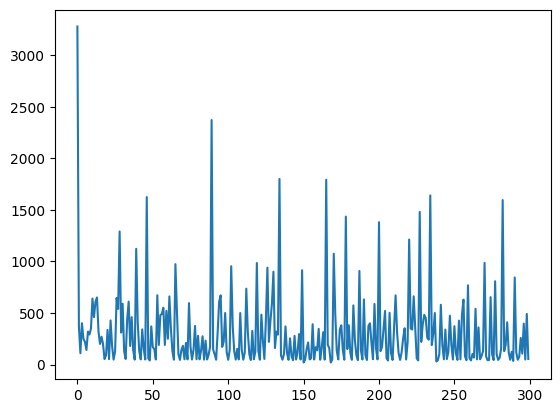

In [54]:
plt.plot(np.diff(events[:,0])[:300])

In [15]:
events

array([[ 86949,      0,      1],
       [ 90157,      0,    128],
       [ 90164,      0,    128],
       ...,
       [697296,      0,    128],
       [697303,      0,    128],
       [700533,      0,      1]])

In [7]:
epochs.info

<Info | 25 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...
 chs: 204 Gradiometers, 102 Magnetometers, 19 Stimulus, 2 EOG, 1 ECG, 18 misc
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 dev_head_t: MEG device -> head transform
 dig: 53 items (3 Cardinal, 4 HPI, 46 Extra)
 events: 1 item (list)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 3 items (dict)
 line_freq: 50.0
 lowpass: 330.0 Hz
 maxshield: True
 meas_date: 2022-10-19 09:34:52 UTC
 meas_id: 4 items (dict)
 nchan: 346
 proc_history: 1 item (list)
 proj_id: 1 item (ndarray)
 proj_name: mne_anonymize
 projs: grad_ssp_upright.fif : PCA-v1: on, grad_ssp_upright.fif : ...
 sfreq: 100.0 Hz
 subject_info: 4 items (dict)
>

In [94]:
file1= '/home/is153802/data/BIDS_final/sub-18/ses-01/meg/sub-18_ses-01_task-listen_run-01_meg.fif'
file
fif_321 = mne.io.read_raw_fif(file1,allow_maxshield=True)

/tmp/ipykernel_346973/3726710940.py:1: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  fif_321 = mne.io.read_raw_fif('/home/is153802/data/BIDS_final/sub-18/ses-01/meg/sub-18_ses-01_task-listen_run-01_meg.fif',allow_maxshield=True)


In [97]:
fif_321.add_channels()

TypeError: UpdateChannelsMixin.add_channels() missing 1 required positional argument: 'add_list'